In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
feature_matrix = pd.read_csv("/content/circular_fm_new_pd_vs_swedd_V3.csv")

dfXY = feature_matrix[list(feature_matrix.columns[2:-1])].iloc[:-1]
dfXY

,Point1_x,Point1_y,Point2_x,Point2_y,Point3_x,Point3_y,Point4_x,Point4_y,Point5_x,Point5_y,...,Point8_y,Point9_x,Point9_y,Point10_x,Point10_y,Point11_x,Point11_y,Point12_x,Point12_y,Class
0,-14.965940,-24.109622,-5.718523,22.433197,10.403679,34.547351,7.527728,7.193034,1.611262,-5.246757,...,1.925887,-5.334408,25.427916,1.169027,28.089112,10.873110,-6.030381,22.072095,-43.940360,1.0
1,-26.648210,-8.793532,-1.021482,23.797802,3.224227,32.985070,27.539730,-16.968398,15.589569,-22.625485,...,37.764486,26.971623,1.838039,31.613061,-9.793674,-14.218899,-18.667935,-21.816822,-28.087937,1.0
2,-14.258384,-19.361362,-13.031664,-16.241262,-7.169802,38.035070,-2.482111,16.210351,7.417831,3.065946,...,36.524409,5.581668,30.659701,25.366232,-12.308340,-0.808966,-40.050686,-3.169056,-4.819530,1.0
3,-9.403136,-20.427482,-7.743287,30.699658,-5.847468,31.089556,18.782336,-10.272478,4.348611,-20.924872,...,27.267006,17.803566,-1.258527,4.387847,-10.035003,3.819174,-10.222789,-13.954003,-38.135177,1.0
4,-7.754974,38.840981,0.269436,21.404864,3.106340,23.570528,1.952240,-16.979884,3.326457,-64.731613,...,39.954796,13.933407,30.472380,7.902047,-13.629409,0.993297,-18.352683,-2.134144,-14.781035,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-10.160191,27.892613,-3.274644,21.423117,-0.774635,14.045656,6.949531,-13.199093,5.390604,-29.799825,...,32.034617,0.862721,30.886800,30.469775,-6.163896,11.239357,-13.106810,-15.545569,-19.941540,1.0
1131,-58.300682,24.068048,1.177803,14.860843,9.082150,5.568511,26.364256,-8.815456,25.881814,-9.324208,...,15.480375,16.359712,44.778375,22.072984,-1.556169,10.829599,-22.624437,9.565037,-28.284672,1.0
1132,-26.696589,-16.563309,-24.567611,24.154042,31.019145,34.909707,33.308440,14.745697,7.403584,-30.396934,...,40.615902,40.467466,26.136102,24.756359,-9.082417,-6.692295,-30.323474,-23.209151,-18.405170,1.0
1133,-143.097314,37.116151,33.204215,55.964590,60.308735,21.595838,48.926015,-24.276827,17.310515,-50.425022,...,37.218706,23.447857,-4.591973,-14.291013,-31.147591,-33.671255,-20.155923,-19.890314,18.676781,0.0


In [ ]:
X = dfXY.values

Y = feature_matrix[["Class"]].iloc[:-1]
Y = Y.values
Y = Y.reshape(Y.shape[0],)

print(X.shape)
print(Y.shape)

(1135, 25)
(1135,)


In [ ]:
X

array([[ -14.96594046,  -24.10962211,   -5.71852304, ...,   22.07209482,
         -43.94036008,    1.        ],
       [ -26.64820964,   -8.79353226,   -1.02148207, ...,  -21.81682188,
         -28.08793699,    1.        ],
       [ -14.25838438,  -19.36136237,  -13.03166405, ...,   -3.16905624,
          -4.81952985,    1.        ],
       ...,
       [ -26.69658865,  -16.5633095 ,  -24.56761132, ...,  -23.2091514 ,
         -18.40517034,    1.        ],
       [-143.0973144 ,   37.11615112,   33.20421462, ...,  -19.89031444,
          18.67678108,    0.        ],
       [-150.2097559 ,  -18.79059427,   25.02998111, ...,  -14.79580182,
           7.5470141 ,    0.        ]])

In [ ]:
import numpy as np
# Calculate class weights based on the class frequencies
Y = np.array([int(i) for i in list(Y)])
class_counts = np.bincount(Y)
total_samples = len(Y)
class_weights = total_samples / (len(class_counts) * class_counts)
scale_pos_weight = sum(class_weights) / len(class_weights)

In [ ]:
initializer = tf.keras.initializers.glorot_uniform(seed=12)

# AUTOENCODER FOR CONTROL

In [ ]:
# Train the autoencoder for class 0
from tensorflow.keras.optimizers import Adam


class_0_indices = Y == 0
X_class_0 = X[class_0_indices]
print(len(X_class_0))


184


Batch size = 16 , Epochs = 1000

In [ ]:
# Define an autoencoder model with 4 dense layers for dimensionality reduction
autoencoder_0 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],), kernel_initializer=initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu',kernel_initializer=initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu',kernel_initializer=initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(X.shape[1], activation='linear',kernel_initializer=initializer)
])

# Set the learning rate for the optimizer
learning_rate=0.001

# Compile the autoencoder model with Mean Squared Error (MSE) loss and Adam optimizer
autoencoder_0.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

# Train the autoencoder model on the data X_class_0
autoencoder_0.fit(X_class_0, X_class_0, epochs=1000, batch_size=16)

Epoch 1/1000
12/12 [==============================] - 4s 8ms/step - loss: 2082.0479
Epoch 2/1000
12/12 [==============================] - 0s 8ms/step - loss: 2078.2380
Epoch 3/1000
12/12 [==============================] - 0s 5ms/step - loss: 2075.2012
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 2072.2854
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 2068.2891
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 2064.5671
Epoch 7/1000
12/12 [==============================] - 0s 5ms/step - loss: 2060.2708
Epoch 8/1000
12/12 [==============================] - 0s 5ms/step - loss: 2055.9846
Epoch 9/1000
12/12 [==============================] - 0s 5ms/step - loss: 2050.5632
Epoch 10/1000
12/12 [==============================] - 0s 5ms/step - loss: 2044.8599
Epoch 11/1000
12/12 [==============================] - 0s 10ms/step - loss: 2039.1051
Epoch 12/1000
12/12 [==============================] - 0s 5ms/step - loss

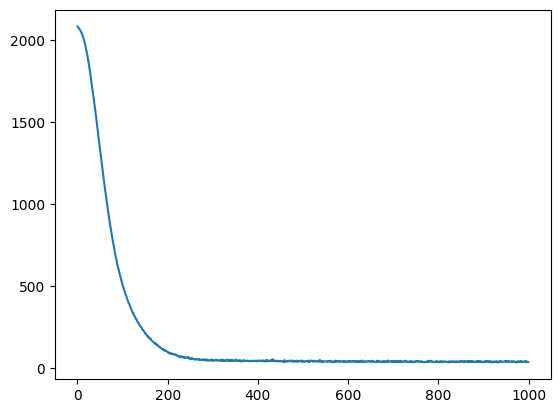

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
# Plot the loss values from the training history of the autoencoder model
plt.plot(autoencoder_0.history.history['loss'])
plt.show()

Comparision between Batch Size = 16 and 32

Epoch 1/1000
12/12 [==============================] - 3s 6ms/step - loss: 2082.2241
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 2078.3232
Epoch 3/1000
12/12 [==============================] - 0s 6ms/step - loss: 2075.1230
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 2071.5952
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 2068.2017
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 2064.3513
Epoch 7/1000
12/12 [==============================] - 0s 5ms/step - loss: 2060.8335
Epoch 8/1000
12/12 [==============================] - 0s 6ms/step - loss: 2056.1309
Epoch 9/1000
12/12 [==============================] - 0s 5ms/step - loss: 2051.1479
Epoch 10/1000
12/12 [==============================] - 0s 6ms/step - loss: 2045.0756
Epoch 11/1000
12/12 [==============================] - 0s 5ms/step - loss: 2039.6664
Epoch 12/1000
12/12 [==============================] - 0s 5ms/step - loss:

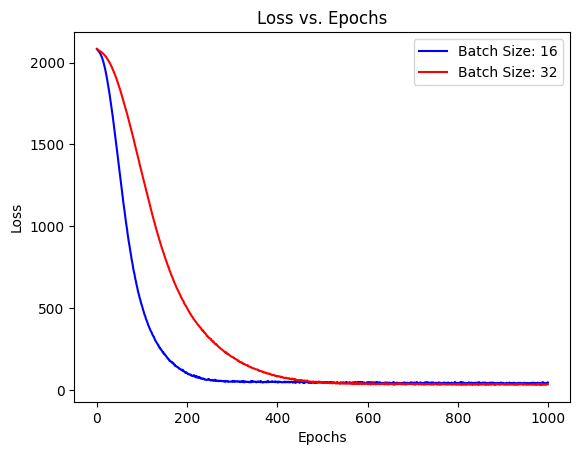

In [ ]:
import matplotlib.pyplot as plt

# Define the batch sizes to train
batch_sizes = [16, 32]

# Define the colors for each batch size
colors = ['blue', 'red']

# Create a new figure for the plot
plt.figure()

for batch_size, color in zip(batch_sizes, colors):
    # Create the autoencoder model
    autoencoder_0 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],), kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(8, activation='relu', kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(16, activation='relu', kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(X.shape[1], activation='linear', kernel_initializer=initializer)
    ])

    learning_rate = 0.001

    autoencoder_0.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # Train the autoencoder
    history = autoencoder_0.fit(X_class_0, X_class_0, epochs=1000, batch_size=batch_size)

    # Plot the loss values with the corresponding color and label
    plt.plot(history.history['loss'], color=color, label=f'Batch Size: {batch_size}')

# Add labels and legend to the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

# Show the plot
plt.show()


Batch size = 32 , Epochs = 1000

In [ ]:
# Define the architecture of the autoencoder model
autoencoder_0 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],), kernel_initializer=initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu',kernel_initializer=initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu',kernel_initializer=initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(X.shape[1], activation='linear',kernel_initializer=initializer)
])

# Set the learning rate for the optimizer
learning_rate=0.001

# Compile the autoencoder model with Mean Squared Error (MSE) loss and Adam optimizer
autoencoder_0.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

# Train the autoencoder model on the data X_class_0 with a batch size of 32 and for 1000 epochs
autoencoder_0.fit(X_class_0, X_class_0, epochs=1000, batch_size=32)

Epoch 1/1000
6/6 [==============================] - 7s 7ms/step - loss: 2083.0386
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 2080.8926
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step - loss: 2078.8787
Epoch 4/1000
6/6 [==============================] - 0s 5ms/step - loss: 2076.7922
Epoch 5/1000
6/6 [==============================] - 0s 5ms/step - loss: 2074.7688
Epoch 6/1000
6/6 [==============================] - 0s 5ms/step - loss: 2072.7927
Epoch 7/1000
6/6 [==============================] - 0s 5ms/step - loss: 2071.0857
Epoch 8/1000
6/6 [==============================] - 0s 5ms/step - loss: 2069.3884
Epoch 9/1000
6/6 [==============================] - 0s 5ms/step - loss: 2067.3679
Epoch 10/1000
6/6 [==============================] - 0s 5ms/step - loss: 2065.4736
Epoch 11/1000
6/6 [==============================] - 0s 6ms/step - loss: 2063.4255
Epoch 12/1000
6/6 [==============================] - 0s 6ms/step - loss: 2061.1375
Epoch 13/1000

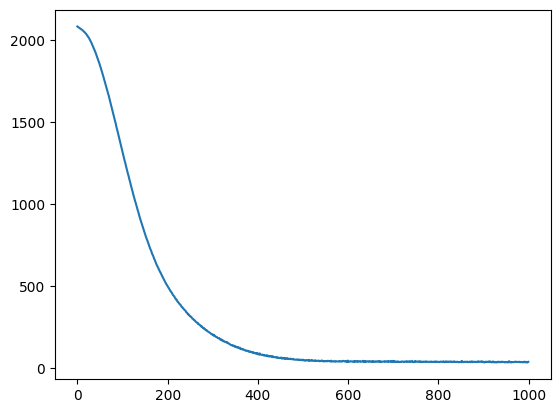

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(autoencoder_0.history.history['loss'])
plt.show()

# AUTOENCODER FOR PD

Comparision between Batch Size = 16 and 32

In [ ]:
class_1_indices = Y == 1
X_class_1 = X[class_1_indices]
print(len(X_class_1))

951


Epoch 1/500
60/60 [==============================] - 3s 5ms/step - loss: 481.0515
Epoch 2/500
60/60 [==============================] - 0s 5ms/step - loss: 469.6027
Epoch 3/500
60/60 [==============================] - 0s 5ms/step - loss: 453.8138
Epoch 4/500
60/60 [==============================] - 0s 5ms/step - loss: 433.7338
Epoch 5/500
60/60 [==============================] - 0s 5ms/step - loss: 408.9427
Epoch 6/500
60/60 [==============================] - 0s 5ms/step - loss: 380.2263
Epoch 7/500
60/60 [==============================] - 0s 5ms/step - loss: 349.9467
Epoch 8/500
60/60 [==============================] - 0s 5ms/step - loss: 316.9281
Epoch 9/500
60/60 [==============================] - 0s 5ms/step - loss: 285.4271
Epoch 10/500
60/60 [==============================] - 0s 5ms/step - loss: 255.5320
Epoch 11/500
60/60 [==============================] - 0s 5ms/step - loss: 226.4492
Epoch 12/500
60/60 [==============================] - 0s 5ms/step - loss: 202.5896
Epoch 13/500


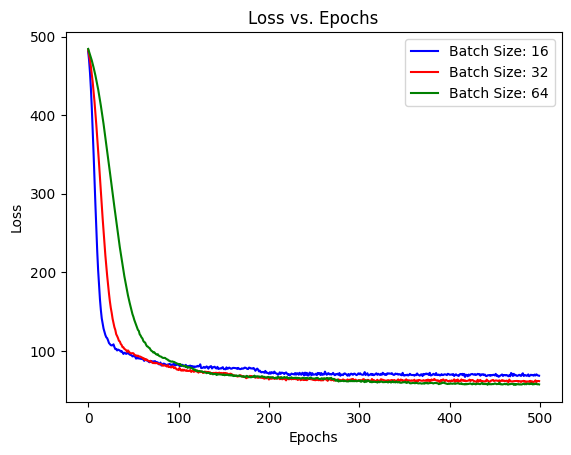

In [ ]:
import matplotlib.pyplot as plt

# Define the batch sizes to train
batch_sizes = [16, 32, 64]

# Define the colors for each batch size
colors = ['blue', 'red','green']

# Create a new figure for the plot
plt.figure()

for batch_size, color in zip(batch_sizes, colors):
    # Create the autoencoder model
    autoencoder_1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],), kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(8, activation='relu', kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(16, activation='relu', kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(X.shape[1], activation='linear', kernel_initializer=initializer)
    ])

    learning_rate = 0.001

    autoencoder_1.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # Train the autoencoder
    history = autoencoder_1.fit(X_class_1, X_class_1, epochs=500, batch_size=batch_size)

    # Plot the loss values with the corresponding color and label
    plt.plot(history.history['loss'], color=color, label=f'Batch Size: {batch_size}')

# Add labels and legend to the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

# Show the plot
plt.show()


Fixing batch size = 64

In [ ]:
from tensorflow.keras.optimizers import Adam

# Train the autoencoder for class 1

# Retrieve the indices of class 1 from the target variable Y
class_1_indices = Y == 1

# Select the corresponding data points for class 1 from the input variable X
X_class_1 = X[class_1_indices]

# Print the number of data points in class 1
print(len(X_class_1))

# Create the autoencoder model for class 1
autoencoder_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],), kernel_initializer=initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu', kernel_initializer=initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer=initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(X.shape[1], activation='linear', kernel_initializer=initializer)
])

# Set the learning rate for the optimizer
learning_rate = 0.001

# Compile the autoencoder model for class 1 with Mean Squared Error (MSE) loss and Adam optimizer
autoencoder_1.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

# Train the autoencoder model for class 1 on the data X_class_1 with a batch size of 64 and for 500 epochs
autoencoder_1.fit(X_class_1, X_class_1, epochs=500, batch_size=64)

951
Epoch 1/500
15/15 [==============================] - 4s 7ms/step - loss: 484.3530
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 480.5885
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 477.1302
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 473.4286
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 469.4660
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 464.9289
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 460.3542
Epoch 8/500
15/15 [==============================] - 0s 5ms/step - loss: 455.4751
Epoch 9/500
15/15 [==============================] - 0s 5ms/step - loss: 450.1519
Epoch 10/500
15/15 [==============================] - 0s 5ms/step - loss: 444.6898
Epoch 11/500
15/15 [==============================] - 0s 5ms/step - loss: 438.5587
Epoch 12/500
15/15 [==============================] - 0s 5ms/step - loss: 432.5284
Epoch 13/

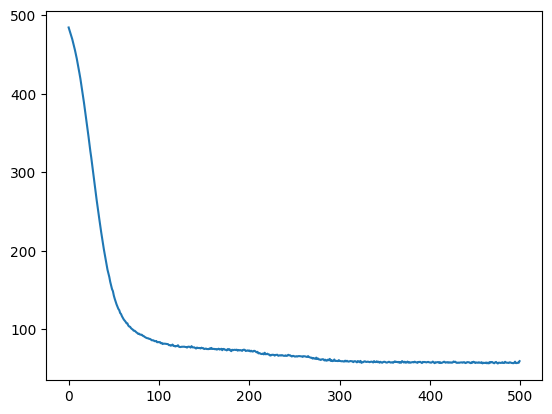

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(autoencoder_1.history.history['loss'])
plt.show()

Working with AE embeddings for Control and PD patients

In [ ]:
from tensorflow.keras import Sequential

# Create an encoder model for autoencoder_0 by extracting its first four layers
encoder_0 = Sequential(autoencoder_0.layers[:4])

# Print the layers of encoder_0
print(encoder_0.layers)

# Print the output shape of the last layer in encoder_0
print(encoder_0.layers[-1].output_shape)

# Create an encoder model for autoencoder_1 by extracting its first four layers
encoder_1 = Sequential(autoencoder_1.layers[:4])

# Print the layers of encoder_1
print(encoder_1.layers)

# Print the output shape of the last layer in encoder_1
print(encoder_1.layers[-1].output_shape)

[<keras.layers.core.dense.Dense object at 0x7fdedccc4880>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fdedccc4e20>, <keras.layers.core.dense.Dense object at 0x7fdedccc4850>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fdedccc4370>]
(None, 8)
[<keras.layers.core.dense.Dense object at 0x7fde50236890>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fdedcc6f850>, <keras.layers.core.dense.Dense object at 0x7fde3551c6d0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fde3551fb20>]
(None, 8)


In [ ]:
# FOR EMBEDDING CONTROL
X_Control_Encoded = encoder_0.predict(X_class_0)
print(X_Control_Encoded.shape)

6/6 [==============================] - 0s 2ms/step
(184, 8)


In [ ]:
# FOR EMBEDDING PD
X_PD_Encoded = encoder_1.predict(X_class_1)
print(X_PD_Encoded.shape)

30/30 [==============================] - 0s 2ms/step
(951, 8)


In [ ]:
X_Control_Encoded[0].shape

(8,)

In [ ]:
df = pd.DataFrame(columns=["Dim1", "Dim2", "Dim3", "Dim4", "Dim5", "Dim6", "Dim7", "Dim8", "Class"])

df

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Class


In [ ]:
import pandas as pd

df = pd.DataFrame(columns=["Dim1", "Dim2", "Dim3", "Dim4", "Dim5", "Dim6", "Dim7", "Dim8", "Class"])

# Get the sizes of X_Control_Encoded and X_PD_Encoded
size0 = X_Control_Encoded.shape[0]
size1 = X_PD_Encoded.shape[0]

# Loop through the combined sizes of X_Control_Encoded and X_PD_Encoded
for i in range(size0+size1):
    if i < size0:
        # Assigning Control = 0
        row = X_Control_Encoded[i].tolist() + [0]
        df.loc[i] = row
    else:
        # Assigning PD = 1
        row = X_PD_Encoded[i - size0].tolist() + [1]
        df.loc[i] = row

# Ensure that the length of the DataFrame is equal to the combined sizes of X_Control_Encoded and X_PD_Encoded
assert len(df) == size0 + size1

df

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Class
0,-1.505505,0.707242,-0.366397,0.245482,0.293242,-1.886204,0.250119,0.009670,0.0
1,-0.210851,0.257124,-0.756717,1.458284,-0.516184,-1.593789,0.098263,1.165515,0.0
2,-0.401345,0.371727,-0.119918,0.477201,-0.100012,-1.667926,-0.203569,0.828936,0.0
3,0.138590,-0.381664,0.099498,1.521276,-1.118588,-1.605956,-0.146202,1.188690,0.0
4,-1.409627,-0.467859,-1.356292,1.176079,-0.383509,-1.311724,0.001227,1.013152,0.0
...,...,...,...,...,...,...,...,...,...
1130,-0.078035,1.159576,0.536247,1.242101,1.444901,-0.646920,0.109109,0.999290,1.0
1131,-1.994948,0.730504,-1.689529,1.304670,0.250969,-1.256376,-1.001668,2.474047,1.0
1132,-1.240847,0.516327,-1.262589,0.486519,0.263771,-1.330382,-0.514905,1.030756,1.0
1133,-0.343320,0.721688,-0.323242,1.335492,0.355174,-0.940377,0.452096,0.249230,1.0


In [ ]:
df = df.sample(frac=1.0, random_state=12)

In [ ]:
df

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Class
987,-0.402455,1.362070,0.593242,0.664227,-0.311838,-2.114487,-1.316070,0.947742,1.0
1024,0.675461,0.340325,1.127218,1.289031,0.856449,-0.729983,-0.545359,0.637191,1.0
658,-0.663407,0.940216,-0.023701,1.425445,0.362818,-1.530221,-0.916498,0.895727,1.0
228,-0.048984,0.907713,-1.107743,1.644474,1.126708,-0.732929,0.466290,2.174264,1.0
749,-0.108098,2.367066,-0.448059,0.500281,0.838766,-1.333647,0.361513,1.674048,1.0
...,...,...,...,...,...,...,...,...,...
418,-0.191549,0.530066,-1.443725,1.693561,1.253301,-0.892638,-1.077182,0.909928,1.0
473,-0.993991,-0.045380,0.978580,2.232410,-0.498705,-1.748762,-1.225763,0.156648,1.0
49,-0.834031,-0.358233,-0.438730,0.161634,1.317855,-0.794511,0.733853,1.033459,0.0
278,-0.431499,1.543092,0.795309,2.667376,0.614646,-1.777488,-0.276578,1.484016,1.0


In [ ]:
df.to_csv("Reduced_Dimension_AE_Dataset.csv")

In [ ]:
import os
os.getcwd()

'/content'

Saving at desired Google drive location

In [ ]:
def changeDirectory(path):
    import os

    # Store the current working directory
    original_path = os.getcwd()

    # Change the directory to the specified path
    os.chdir(path)

    # Get the new working directory
    new_path = os.getcwd()

    print("Original path:", original_path)
    print("New path:", new_path)

changeDirectory("/content/drive/MyDrive/Reduced_dimension_AE")

Original path:  /content
New path:  /content/drive/MyDrive/Reduced_dimension_AE


In [ ]:
df.to_csv("Reduced_Dimension_AE_Dataset.csv")